# Customer Segmentation using K-Means Clustering

## 1. Introduction
In this project, we perform customer segmentation using the K-Means clustering algorithm. We use retail transaction data and extract meaningful patterns to segment customers based on purchasing behavior. This can help businesses develop targeted marketing strategies.

## 2. Data Loading and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats

In [3]:
# Load the dataset (Ensure the CSV file is in the same directory)
df = pd.read_csv(r'C:\Users\HP\Basic\cleaned_retail_data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_scaled,UnitPrice_scaled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,-0.016761,-0.021520
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.016761,-0.012892
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,-0.007631,-0.019465
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.016761,-0.012892
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,-0.016761,-0.012892


## 3. Feature Engineering

In [4]:
# Create new features
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

In [5]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

## 4. Outlier Detection and Removal (Z-Score Method)

In [6]:
# Remove outliers using Z-score
numeric_cols = ['Quantity', 'UnitPrice', 'TotalAmount']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]
print(f'Shape after removing outliers: {df.shape}')

Shape after removing outliers: (534310, 48)


## 5. Feature Scaling

In [7]:
# Select features to scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Quantity', 'UnitPrice', 'TotalAmount', 'InvoiceHour']])

## 6. K-Means Clustering

In [8]:
# Combine with country features
country_cols = [col for col in df.columns if col.startswith('Country_')]
X = np.hstack([scaled_features, df[country_cols].values])

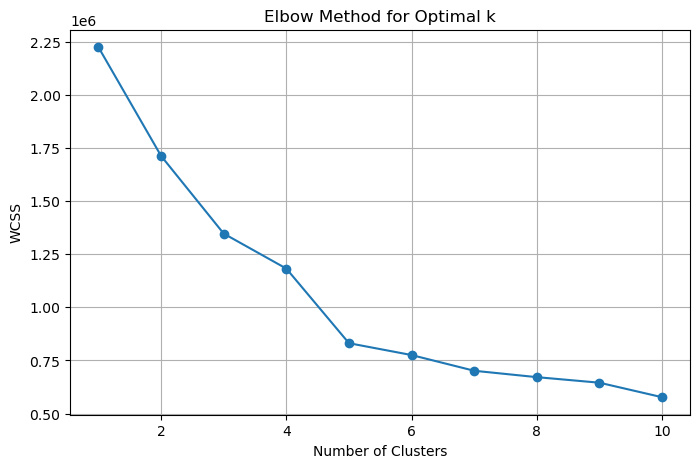

In [9]:
# Elbow Method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [10]:
# Apply KMeans with optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

## 7. Visualizing Clusters using PCA

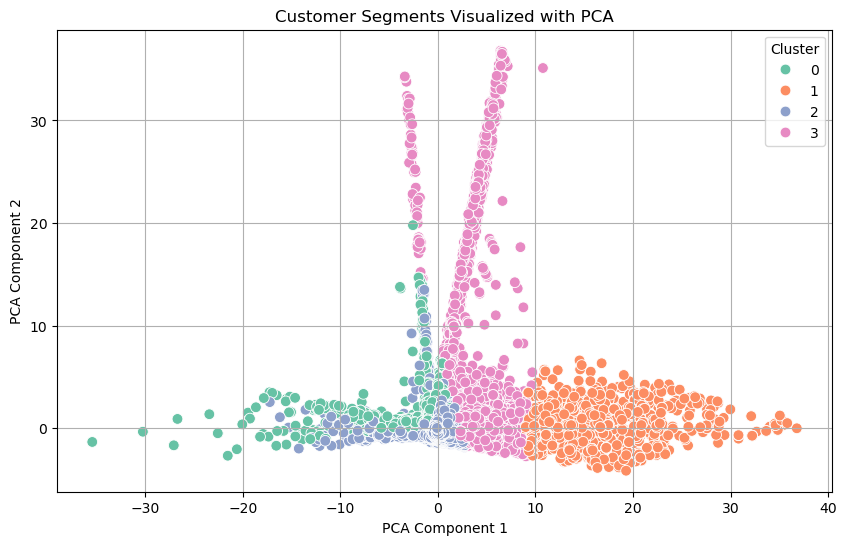

In [11]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

## 8. Cluster Summary

In [12]:
# Summary statistics by cluster
numeric_df = df.select_dtypes(include=['number'])
cluster_summary = numeric_df.groupby('Cluster').agg(['mean', 'median', 'std'])
cluster_summary

Quantity                     UnitPrice                    \
               mean median         std       mean median        std   
Cluster                                                               
0          5.201592    2.0   11.734054   3.458235   2.46   3.960223   
1        270.509989  240.0  141.475811   2.612429   1.79   3.210953   
2          7.490108    4.0   10.483946   3.155254   2.08   3.441327   
3         76.401424   72.0   52.496117  12.730026   1.85  39.327072   

        Quantity_scaled                     UnitPrice_scaled  ... TotalAmount  \
                   mean    median       std             mean  ...         std   
Cluster                                                       ...               
0             -0.020405 -0.035021  0.053566        -0.012191  ...   16.426974   
1              1.190723  1.051445  0.645835        -0.020878  ...  236.824441   
2             -0.009958 -0.025891  0.047859        -0.015303  ...   15.994834   
3              0.304621  0.284528  0.239644         0.083036  ...   78.271792   

        InvoiceHour                        PCA1                       \
               mean median       std       mean     median       std   
Cluster                                                                
0         15.366078   15.0  1.218796  -0.396035  -0.499060  0.533312   
1         12.492114   12.0  2.733410  14.457973  13.042674  4.851349   
2         11.262539   12.0  1.436629   0.021767  -0.066442  0.501917   
3         12.179210   12.0  2.368233   4.070253   3.695288  1.757563   

             PCA2                      
             mean    median       std  
Cluster                                
0        0.332020  0.216642  0.535489  
1       -0.030864 -0.087691  1.712248  
2       -0.322846 -0.393909  0.482975  
3        1.058269 -0.198206  4.927279  

[4 rows x 24 columns]

## 📈 Cluster Interpretation Summary

Based on the clustering and PCA visualization:

- **Cluster 0**: Low quantity, low-moderate spenders — possibly casual or individual retail customers.
- **Cluster 1**: High quantity, low price — likely wholesale buyers or large retailers.
- **Cluster 2**: Small purchases, very similar to Cluster 0 but slightly different time and frequency behavior.
- **Cluster 3**: Medium-high quantity with high price — likely premium or business customers.

This segmentation helps in tailoring marketing and pricing strategies for each customer group.
